In [1]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

In [2]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO FRACTURA DE CADERA AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,01/01/2022 13:57:00,31/01/2022 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre
1,01/01/2022 14:04:00,05/01/2022 14:43:00,Sábado,Miércoles,Z.B.S. Zamora Norte,Rural,C.A. Zamora,Zamora,Zamora,88,Mujer
2,01/01/2022 15:37:00,11/01/2022 06:15:00,Sábado,Martes,Z.B.S. Villamuriel de Cerrato,Urbano,C.A.U. Palencia,Palencia,Palencia,92,Mujer
3,01/01/2022 17:57:00,05/01/2022 17:35:00,Sábado,Miércoles,Z.B.S. Periurbana Sur,Rural,C.A.U. Salamanca,Salamanca,Salamanca,85,Mujer
4,01/01/2022 21:07:00,10/01/2022 13:58:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,82,Mujer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121 entries, 0 to 9120
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          9121 non-null   object
 1   Fecha de alta                             9121 non-null   object
 2   Día de la semana en la fecha del ingreso  9121 non-null   object
 3   Día de la semana en la fecha del alta     9121 non-null   object
 4   Zona Básica de Salud del Paciente         9118 non-null   object
 5   Ámbito de procedencia                     9118 non-null   object
 6   Hospital                                  9121 non-null   object
 7   Área                                      9121 non-null   object
 8   Provincia                                 9121 non-null   object
 9   Edad                                      9121 non-null   int64 
 10  Sexo                                      9121 n

None

In [3]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [4]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_de_fractura_de_cadera.csv', index=False)

In [5]:
# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['Fecha hospitalizado'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [6]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['Fecha hospitalizado'] = pd.to_datetime(expanded_df['Fecha hospitalizado'])



In [7]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,Fecha hospitalizado
0,2022-01-01 13:57:00,2022-01-31 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre,2022-01-01
0,2022-01-01 13:57:00,2022-01-31 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre,2022-01-02
0,2022-01-01 13:57:00,2022-01-31 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre,2022-01-03
0,2022-01-01 13:57:00,2022-01-31 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre,2022-01-04
0,2022-01-01 13:57:00,2022-01-31 21:13:00,Sábado,Lunes,Z.B.S. José Luis Santamaría,Urbano,C.A.U. Burgos,Burgos,Burgos,92,Hombre,2022-01-05


,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,Fecha hospitalizado
9120,2024-12-31 20:57:00,2025-01-14 13:50:00,Martes,Martes,Z.B.S. Cacabelos,Rural,H. El Bierzo,Bierzo,León,92,Hombre,2025-01-10
9120,2024-12-31 20:57:00,2025-01-14 13:50:00,Martes,Martes,Z.B.S. Cacabelos,Rural,H. El Bierzo,Bierzo,León,92,Hombre,2025-01-11
9120,2024-12-31 20:57:00,2025-01-14 13:50:00,Martes,Martes,Z.B.S. Cacabelos,Rural,H. El Bierzo,Bierzo,León,92,Hombre,2025-01-12
9120,2024-12-31 20:57:00,2025-01-14 13:50:00,Martes,Martes,Z.B.S. Cacabelos,Rural,H. El Bierzo,Bierzo,León,92,Hombre,2025-01-13
9120,2024-12-31 20:57:00,2025-01-14 13:50:00,Martes,Martes,Z.B.S. Cacabelos,Rural,H. El Bierzo,Bierzo,León,92,Hombre,2025-01-14


<class 'pandas.core.frame.DataFrame'>
Index: 91993 entries, 0 to 9120
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha de ingreso                          91993 non-null  datetime64[ns]
 1   Fecha de alta                             91993 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  91993 non-null  object        
 3   Día de la semana en la fecha del alta     91993 non-null  object        
 4   Zona Básica de Salud del Paciente         91958 non-null  object        
 5   Ámbito de procedencia                     91958 non-null  object        
 6   Hospital                                  91993 non-null  object        
 7   Área                                      91993 non-null  object        
 8   Provincia                                 91993 non-null  object        
 9   Edad                              

None

In [8]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria = expanded_df.groupby(['Fecha hospitalizado', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria.head()

,Fecha hospitalizado,Hospital,Occupancy
0,2021-10-28,C.A.U. Burgos,1
1,2021-10-29,C.A.U. Burgos,1
2,2021-10-30,C.A.U. Burgos,1
3,2021-10-31,C.A.U. Burgos,1
4,2021-11-01,C.A.U. Burgos,1


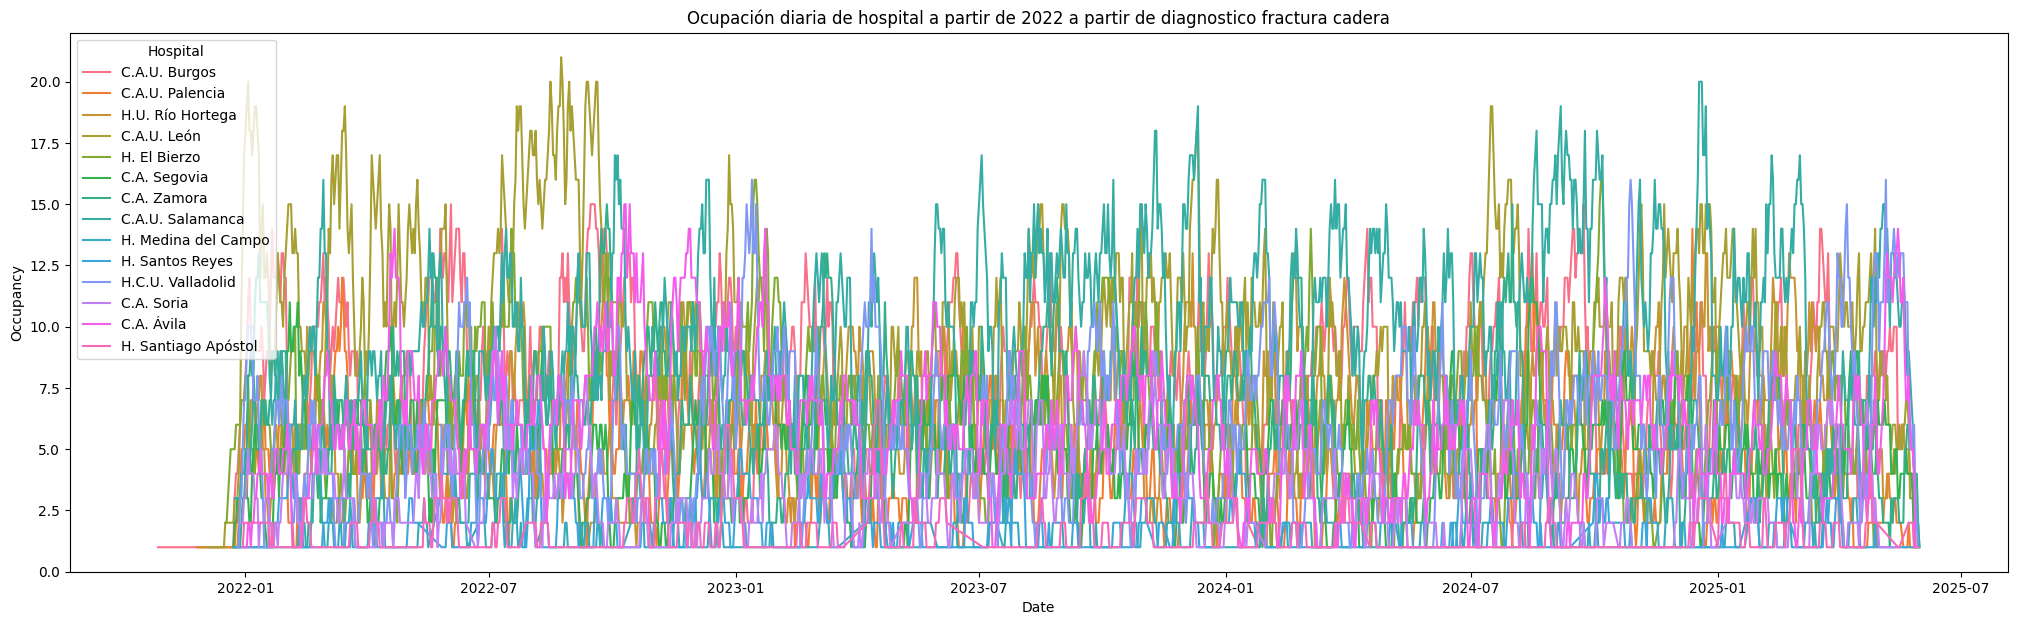

In [9]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria, x='Fecha hospitalizado', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico fractura cadera')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [10]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria.to_csv('Ocupación_total_diaria hospitales por fractura de cadera.csv', index=False)
